In [2]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("lab.csv")

In [4]:
df.head(1)

,country,age,salary,purchase
0,france,NaN,7200,no


In [5]:
df.tail(1)

,country,age,salary,purchase
3,uk,49.0,9800,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   4 non-null      object 
 1   age       3 non-null      float64
 2   salary    4 non-null      int64  
 3   purchase  4 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ bytes


In [7]:
df.describe()

,age,salary
count,3.000000,4.000000
mean,35.333333,6800.000000
std,11.930353,2244.994432
min,27.000000,4800.000000
25%,28.500000,5250.000000
50%,30.000000,6300.000000
75%,39.500000,7850.000000
max,49.000000,9800.000000


In [8]:
df.isnull().sum()


country     0
age         1
salary      0
purchase    0
dtype: int64

In [11]:
df["age"].fillna(df["age"].mean(),inplace=True)
df.isnull().sum()

country     0
age         0
salary      0
purchase    0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer
x=df.iloc[:,:-1].values
x

array([['france', 35.333333333333336, 7200],
       ['spain', 27.0, 4800],
       ['germany', 30.0, 5400],
       ['uk', 49.0, 9800]], dtype=object)

In [13]:
y=df.iloc[:,3:].values
y

array([['no'],
       ['yes'],
       ['yes'],
       ['no']], dtype=object)

In [15]:
imp=SimpleImputer(missing_values=np.nan, strategy="mean") 
x[:,1:3]=imp.fit_transform(x[:,1:3])
x

array([['france', 35.333333333333336, 7200.0],
       ['spain', 27.0, 4800.0],
       ['germany', 30.0, 5400.0],
       ['uk', 49.0, 9800.0]], dtype=object)

In [16]:
y

array([['no'],
       ['yes'],
       ['yes'],
       ['no']], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
h=le.fit_transform(x[:,0])
h

array([0, 2, 1, 3])

In [21]:
y=le.fit_transform(y)
y

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 0])

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transform=ColumnTransformer([("norm1",OneHotEncoder(),[0])],remainder="passthrough")
x=transform.fit_transform(x)
x

array([[1.0, 0.0, 0.0, 0.0, 35.333333333333336, 7200.0],
       [0.0, 0.0, 1.0, 0.0, 27.0, 4800.0],
       [0.0, 1.0, 0.0, 0.0, 30.0, 5400.0],
       [0.0, 0.0, 0.0, 1.0, 49.0, 9800.0]], dtype=object)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,4:6]=sc.fit_transform(x_train[:,4:6])
x_train

array([[0.0, 0.0, 0.0, 1.0, 1.3109359202840398, 1.2407439820518444],
       [0.0, 0.0, 1.0, 0.0, -1.1149081191200718, -1.2080928246294278],
       [1.0, 0.0, 0.0, 0.0, -0.1960278011639687, -0.03265115742241711]],
      dtype=object)

AttributeError: 'DataFrame' object has no attribute 'xlabel'

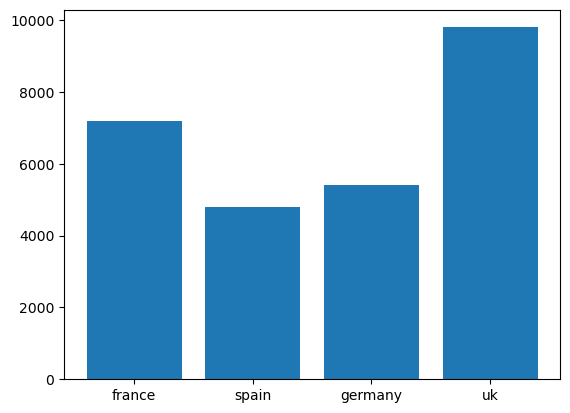

In [28]:
plt.bar(df["country"],df["salary"])
df.xlabel("country")
df.ylabel("salary")
plt.show()
                         

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


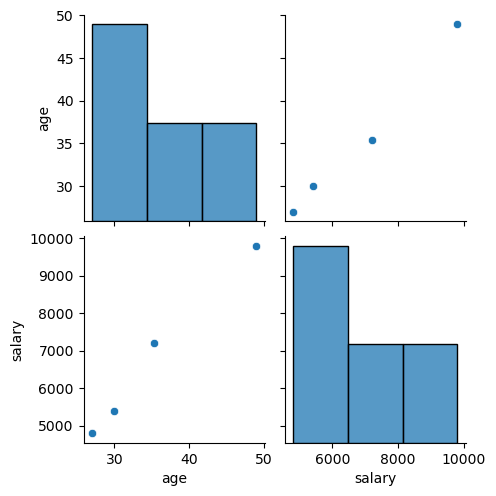

In [29]:
import seaborn as sns
sns.pairplot(df)